Add our import statements

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix , roc_curve , auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from matplotlib import rcParams
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from mlxtend.plotting import category_scatter

Pull in our dataset from Github

In [ ]:
url = 'https://raw.githubusercontent.com/jmrieck17/CSC-5800-Final-Project/main/heart.csv'
df = pd.read_csv(url)

print(df.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


Show some summary statistics here...

In [ ]:
print('Dataframe Shape:' , df.shape)
print('Column Variables' , list(df.columns))

Dataframe Shape: (1025, 14)
Column Variables ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


Here is some more information on the attributes of each column in the dataset:

- **age** (continuous variable)
- **sex** (binary)
    - 1 = male 
    - 0 = female
- **cp** : chest pain type 
    - 1 = typical angina 
    - 2 = atypical angina 
    - 3 = non-anginal pain 
    - 4 = asymptomatic)
- **trestbps** : resting blood pressure (continuous variable)
- **chol** : serum cholestoral in mg/dl (continuous variable)
- **fbs** : fasting blood sugar > 120 mg/dl 
    - 1 = true
    - 0 = false
- **restecg** _ resting electrocardiographic results 
    - 0 = normal
    - 1 = having ST-T wave abnormality
    - 2 = showing probable or definite left ventricular hypertrophy
- **thalach** : maximum heart rate achieved (continuous variable)
- **exang** : exercise induced angina 
    - 1 = yes
    - 0 = no
- **oldpeak** : ST depression induced by exercise relative to rest (continuous variable)
- **slope** : the slope of the peak exercise ST segment 
    - 1 = up-sloping 
    - 2 = flat
    - 3 = down-sloping
- **ca** : number of major vessels 
    - (0-3) colored by flourosopy
- **thal** 
    - 0 = normal
    - 1 = fixed defect
    - 2 = reversable defect
- **target** : diagnosis of heart disease
    - 0 = no
    - 1 = yes

*more information on the data can be found: https://archive.ics.uci.edu/ml/datasets/heart+Disease*


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Visualizations

## Data Pre-Processing Steps

In [ ]:
X = df.iloc[:,:13] # take the 1st 13 columns of the dataframe
y = df.iloc[: , -1] # take the last column of the dataframe

# scaler = MinMaxScaler() # play around with different scalers
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split our dataset into testing and training samples to create our prediction algorithms

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2 , random_state = 1234) # splitting the dataset into 80% validation and 20% test

##Logistic Regression

To start with, Im going to utilize the python package GridSearchCV to help me fine-tune the hyper-parameters of the logistic regression package. This will tell me which hyper-parameters I need to use to get the highest accuracy score on the machine learning model

In [ ]:
parameters_lr = {
    'penalty' : ['none' , 'l1' , 'l2'],
    'C'       : [100 , 10 , 1.0 , 0.1 , 0.01],
    'solver'  : ['newton-cg' , 'lbfgs' , 'sag' , 'saga'],
    'max_iter' : [100]
}

cv = 5 # so this will split the dataset into 5 kfold validation chunks for the GridSearchCv to run through

lr = LogisticRegression(random_state = 1234)
clf = GridSearchCV(lr,                   
                   param_grid = parameters_lr,  
                   scoring = 'accuracy',        
                   cv = cv)  

clf.fit(X_train , y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Tuned Hyperparameters : {'C': 100, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}
Accuracy : 0.8341463414634147


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

Based on the hyper-parameters found above, the best hyper-parameters I can use in my model are:

- penalty = none
- C = 100
- solver = newton-cg

I will now plug those hyper-parameters into the model below for my analysis

In [ ]:
lr = LogisticRegression(C = 100, penalty = 'none' , solver = 'newton-cg' , max_iter = 100, n_jobs = -1 , verbose = 2 , random_state = 1234)
lr.fit(X_train , y_train)
predict_lr = lr.predict(X_test)

print("Accuracy:" , accuracy_score(y_test, predict_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predict_lr))
print('Classification Report Table:')
print(classification_report(y_test, predict_lr))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.8536585365853658
Confusion Matrix:
[[79 22]
 [ 8 96]]
Classification Report Table:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       101
           1       0.81      0.92      0.86       104

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


## Naive Bayes

Since there are fewer hyper-parameters for me to fine tune on the Gaussian Naive Bayes package, i am just going to run the package and pass through my training and test datasets to see what my accuracy score is with this method

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train , y_train)
predict_gnb = gnb.predict(X_test)

print("Accuracy:" , accuracy_score(y_test, predict_gnb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predict_gnb))
print('Classification Report Table:')
print(classification_report(y_test, predict_gnb))

Accuracy: 0.8390243902439024
Confusion Matrix:
[[79 22]
 [11 93]]
Classification Report Table:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       101
           1       0.81      0.89      0.85       104

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



## K Nearest neighbors

In [ ]:
parameters_knn = {
    'n_neighbors' : [1,3,5,7,9,11,13,15,17],
    'weights'       : ['uniform' , 'distance'],
    'metric'  : ['euclidean' , 'manhattan' , 'minkowski']
}

cv = 5

knn = KNeighborsClassifier()
knneighbors = GridSearchCV(knn,                   
                   param_grid = parameters_knn,  
                   scoring = 'accuracy',        
                   cv = cv)  

knneighbors.fit(X_train , y_train)

print("Tuned Hyperparameters :", knneighbors.best_params_)
print("Accuracy :",knneighbors.best_score_)

Tuned Hyperparameters : {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.9926829268292682


Based on the hyper-parameters found above, the best hyper-parameters I can use in my model are:

- n_neighbors = 1
- weights = uniform
- metric = manhattan

I will now plug those hyper-parameters into the model below for my analysis

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1 , metric = 'manhattan' , weights = 'uniform')
knn.fit(X_train , y_train)
predict_knn = knn.predict(X_test)

print("Accuracy:" , accuracy_score(y_test, predict_knn))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predict_knn))
print('Classification Report Table:')
print(classification_report(y_test, predict_knn))

Accuracy: 1.0
Confusion Matrix:
[[101   0]
 [  0 104]]
Classification Report Table:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       104

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



## Decision Tree Classifier

In [ ]:
parameters_dtree = {
    'criterion' : [ 'gini', 'entropy', 'log_loss' ],
    'splitter'  : ['best', 'random']
}

cv = 5 # so this will split the dataset into 5 kfold validation chunks for the GridSearchCv to run through

dtree = DecisionTreeClassifier()
dtc = GridSearchCV(dtree,                   
                   param_grid = parameters_dtree,  
                   scoring = 'accuracy',        
                   cv = cv)  

dtc.fit(X_train , y_train)

print("Tuned Hyperparameters :", dtc.best_params_)
print("Accuracy :",dtc.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'splitter': 'best'}
Accuracy : 0.9865853658536585


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mess

Based on the hyper-parameters found above, the best hyper-parameters I can use in my model are:

- criterion = gini
- splitter = best

I will now plug those hyper-parameters into the model below for my analysis

In [ ]:
dtree = DecisionTreeClassifier(criterion = 'gini' , splitter = 'best')
dtree.fit(X_train , y_train)
predict_dtc = dtree.predict(X_test)

print("Accuracy:" , accuracy_score(y_test, predict_dtc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predict_dtc))
print('Classification Report Table:')
print(classification_report(y_test, predict_dtc))

Accuracy: 1.0
Confusion Matrix:
[[101   0]
 [  0 104]]
Classification Report Table:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       104

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



[Text(0.4479166666666667, 0.95, 'cp <= -0.43\ngini = 0.5\nsamples = 820\nvalue = [398, 422]\nclass = 1'),
 Text(0.22058823529411764, 0.85, 'ca <= -0.247\ngini = 0.375\nsamples = 396\nvalue = [297, 99]\nclass = 0'),
 Text(0.12745098039215685, 0.75, 'thal <= 0.284\ngini = 0.5\nsamples = 175\nvalue = [87, 88]\nclass = 1'),
 Text(0.058823529411764705, 0.65, 'thalach <= -1.288\ngini = 0.373\nsamples = 101\nvalue = [25, 76]\nclass = 1'),
 Text(0.0392156862745098, 0.55, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = 0'),
 Text(0.0784313725490196, 0.55, 'exang <= 0.346\ngini = 0.32\nsamples = 95\nvalue = [19, 76]\nclass = 1'),
 Text(0.0392156862745098, 0.45, 'chol <= 1.367\ngini = 0.123\nsamples = 61\nvalue = [4, 57]\nclass = 1'),
 Text(0.0196078431372549, 0.35, 'gini = 0.0\nsamples = 54\nvalue = [0, 54]\nclass = 1'),
 Text(0.058823529411764705, 0.35, 'trestbps <= 0.194\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = 0'),
 Text(0.0392156862745098, 0.25, 'gini = 0.0\nsamples = 4\nvalue = 

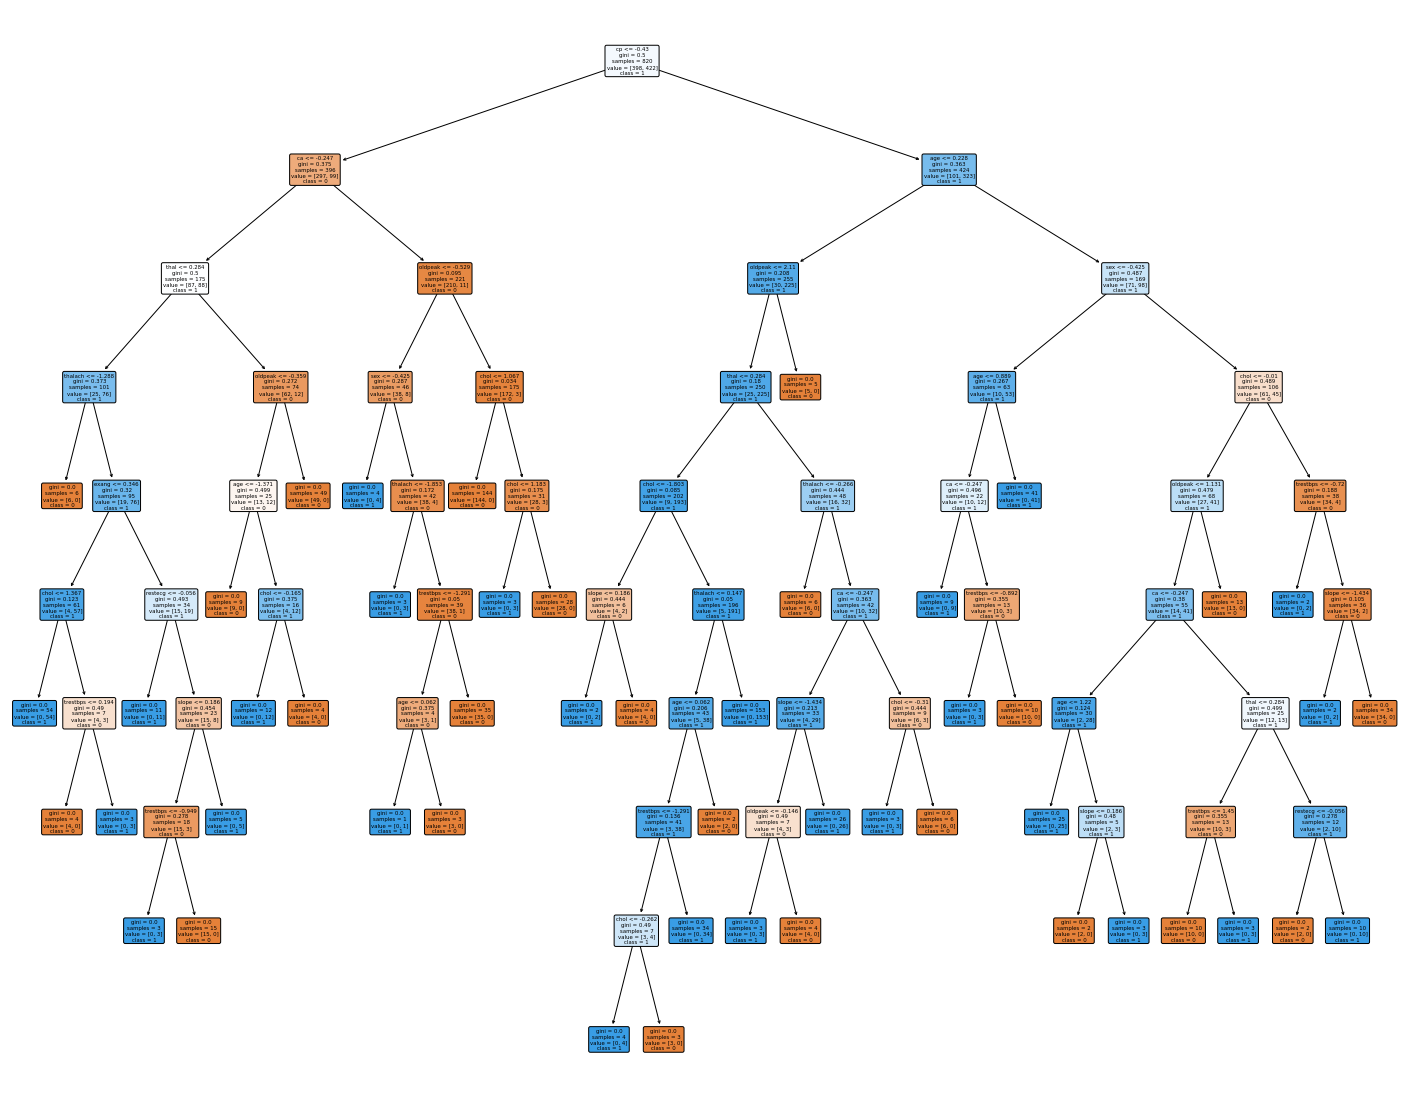

In [ ]:
feature_names = df.columns[:13]

rcParams['figure.figsize'] = (25, 20)
plot_tree(dtree, 
          feature_names = feature_names , 
          class_names = ['0','1'] , 
          filled = True, 
          rounded = True)

In [ ]:
# plt.savefig('tree_visualization.png') 

## Principal Component Analysis (Feature Reduction)

To try and improve the Logistic Regression and Naive Bayes classifier algorithms, we will reduce the number of features in the dataset from 13 to 2 and see if this improves our accuracy scores

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled , columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

pca = PCA(n_components = 2)
data_2d = pca.fit_transform(X_scaled_df)
data_2d_df = pd.DataFrame(data_2d , columns = ['x' , 'y'])
data_2d_df['target'] = y
data_2d_df.head()

,x,y,target
0,-0.522349,-1.113241,0
1,2.590824,-0.534240,0
2,3.042770,-1.328574,0
3,-0.492405,-0.277012,0
4,2.186846,1.952945,0


We'll do a quick visualization of the PCA reduction via 2d graph below to see if there are any discernable patterns in the data.

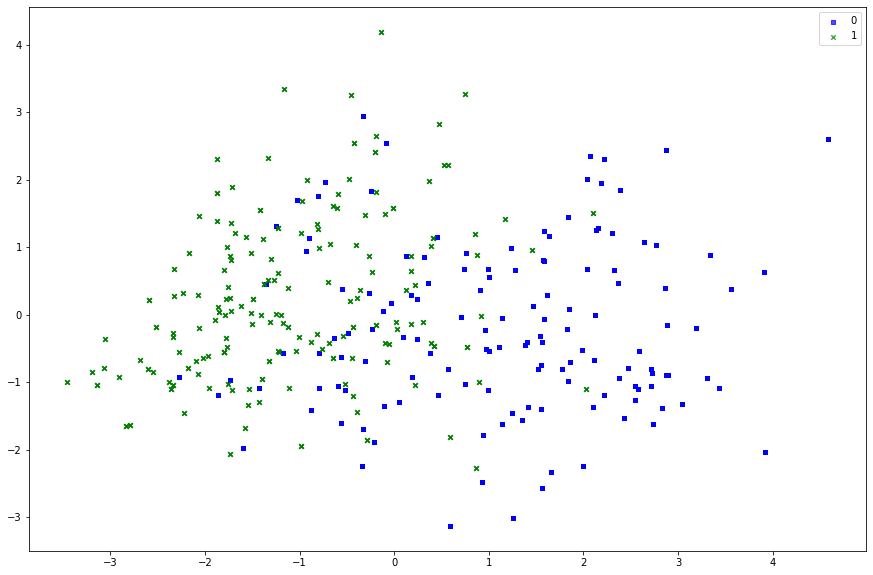

In [ ]:
rcParams['figure.figsize'] = (15, 10)

fig = category_scatter(data = data_2d_df , x = 'x' , y = 'y' , label_col = 'target')

In [ ]:
# plt.savefig('2d_PCA_visualization.png') 

In [ ]:
X_PCA = data_2d_df.iloc[:,:2]
y_PCA = data_2d_df.iloc[: , -1]

X_trainPCA , X_testPCA , y_trainPCA , y_testPCA = train_test_split(X_PCA,y_PCA,test_size=0.2 , random_state = 1234)

In [ ]:
parameters_lr = {
    'penalty' : ['none' , 'l1' , 'l2'],
    'C'       : [100 , 10 , 1.0 , 0.1 , 0.01],
    'solver'  : ['newton-cg' , 'lbfgs' , 'sag' , 'saga'],
    'max_iter' : [100]
}

cv = 5

lr = LogisticRegression(random_state= 1234)
clf = GridSearchCV(lr,                   
                   param_grid = parameters_lr,  
                   scoring = 'accuracy',        
                   cv = cv)  

clf.fit(X_trainPCA , y_trainPCA)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Tuned Hyperparameters : {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8012195121951219


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [ ]:
lr = LogisticRegression(C = 0.01, penalty = 'l2' , solver = 'newton-cg' , max_iter = 100, n_jobs = -1 , verbose = 2 , random_state = 1234)
lr.fit(X_trainPCA , y_trainPCA)
predict_lr = lr.predict(X_testPCA)

print("Accuracy:" , accuracy_score(y_testPCA, predict_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_testPCA, predict_lr))
print('Classification Report Table:')
print(classification_report(y_testPCA, predict_lr))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.8536585365853658
Confusion Matrix:
[[78 23]
 [ 7 97]]
Classification Report Table:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       101
           1       0.81      0.93      0.87       104

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


In [ ]:
gnb = GaussianNB()
gnb.fit(X_trainPCA , y_trainPCA)
predict_gnb = gnb.predict(X_testPCA)

print("Accuracy:" , accuracy_score(y_testPCA, predict_gnb))
print('Confusion Matrix:')
print(confusion_matrix(y_testPCA, predict_gnb))
print('Classification Report Table:')
print(classification_report(y_testPCA, predict_gnb))

Accuracy: 0.8585365853658536
Confusion Matrix:
[[78 23]
 [ 6 98]]
Classification Report Table:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       101
           1       0.81      0.94      0.87       104

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



It looks like PCA did offer some slightly better results for the Naive Bayes algorithm and similar results for Logistic Regression

In [ ]:
parameters_knn = {
    'n_neighbors' : [1,3,5,7,9,11,13,15,17],
    'weights'       : ['uniform' , 'distance'],
    'metric'  : ['euclidean' , 'manhattan' , 'minkowski']
}

cv = 5

knn = KNeighborsClassifier()
knneighbors = GridSearchCV(knn,                   
                   param_grid = parameters_knn,  
                   scoring = 'accuracy',        
                   cv = cv)  

knneighbors.fit(X_trainPCA , y_trainPCA)

print("Tuned Hyperparameters :", knneighbors.best_params_)
print("Accuracy :",knneighbors.best_score_)

Tuned Hyperparameters : {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}
Accuracy : 0.9902439024390244


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 17 , metric = 'euclidean' , weights = 'distance')
knn.fit(X_trainPCA , y_trainPCA)
predict_knn = knn.predict(X_testPCA)

print("Accuracy:" , accuracy_score(y_testPCA, predict_knn))
print('Confusion Matrix:')
print(confusion_matrix(y_testPCA, predict_knn))
print('Classification Report Table:')
print(classification_report(y_testPCA, predict_knn))

Accuracy: 1.0
Confusion Matrix:
[[101   0]
 [  0 104]]
Classification Report Table:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       104

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
parameters_dtree = {
    'criterion' : [ 'gini', 'entropy', 'log_loss' ],
    'splitter'  : ['best', 'random']
}

cv = 5 # so this will split the dataset into 5 kfold validation chunks for the GridSearchCv to run through

dtree = DecisionTreeClassifier()
dtc = GridSearchCV(dtree,                   
                   param_grid = parameters_dtree,  
                   scoring = 'accuracy',        
                   cv = cv)  

dtc.fit(X_trainPCA , y_trainPCA)

print("Tuned Hyperparameters :", dtc.best_params_)
print("Accuracy :",dtc.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'splitter': 'best'}
Accuracy : 0.9890243902439024


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mess

In [ ]:
dtree = DecisionTreeClassifier(criterion = 'gini' , splitter = 'best')
dtree.fit(X_trainPCA , y_trainPCA)
predict_dtc = dtree.predict(X_testPCA)

print("Accuracy:" , accuracy_score(y_testPCA, predict_dtc))
print('Confusion Matrix:')
print(confusion_matrix(y_testPCA, predict_dtc))
print('Classification Report Table:')
print(classification_report(y_testPCA, predict_dtc))

Accuracy: 1.0
Confusion Matrix:
[[101   0]
 [  0 104]]
Classification Report Table:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       104

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



[Text(0.581875, 0.96875, 'x <= 0.923\ngini = 0.5\nsamples = 820\nvalue = [398, 422]\nclass = 1'),
 Text(0.32875, 0.90625, 'x <= -1.035\ngini = 0.398\nsamples = 566\nvalue = [155, 411]\nclass = 1'),
 Text(0.15, 0.84375, 'y <= -0.902\ngini = 0.167\nsamples = 250\nvalue = [23, 227]\nclass = 1'),
 Text(0.1, 0.78125, 'y <= -0.92\ngini = 0.359\nsamples = 64\nvalue = [15, 49]\nclass = 1'),
 Text(0.08, 0.71875, 'x <= -1.914\ngini = 0.316\nsamples = 61\nvalue = [12, 49]\nclass = 1'),
 Text(0.06, 0.65625, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]\nclass = 1'),
 Text(0.1, 0.65625, 'x <= -1.809\ngini = 0.438\nsamples = 37\nvalue = [12, 25]\nclass = 1'),
 Text(0.08, 0.59375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.12, 0.59375, 'x <= -1.427\ngini = 0.389\nsamples = 34\nvalue = [9, 25]\nclass = 1'),
 Text(0.1, 0.53125, 'x <= -1.479\ngini = 0.453\nsamples = 26\nvalue = [9, 17]\nclass = 1'),
 Text(0.08, 0.46875, 'y <= -1.004\ngini = 0.386\nsamples = 23\nvalue = [6, 17]\nclass = 

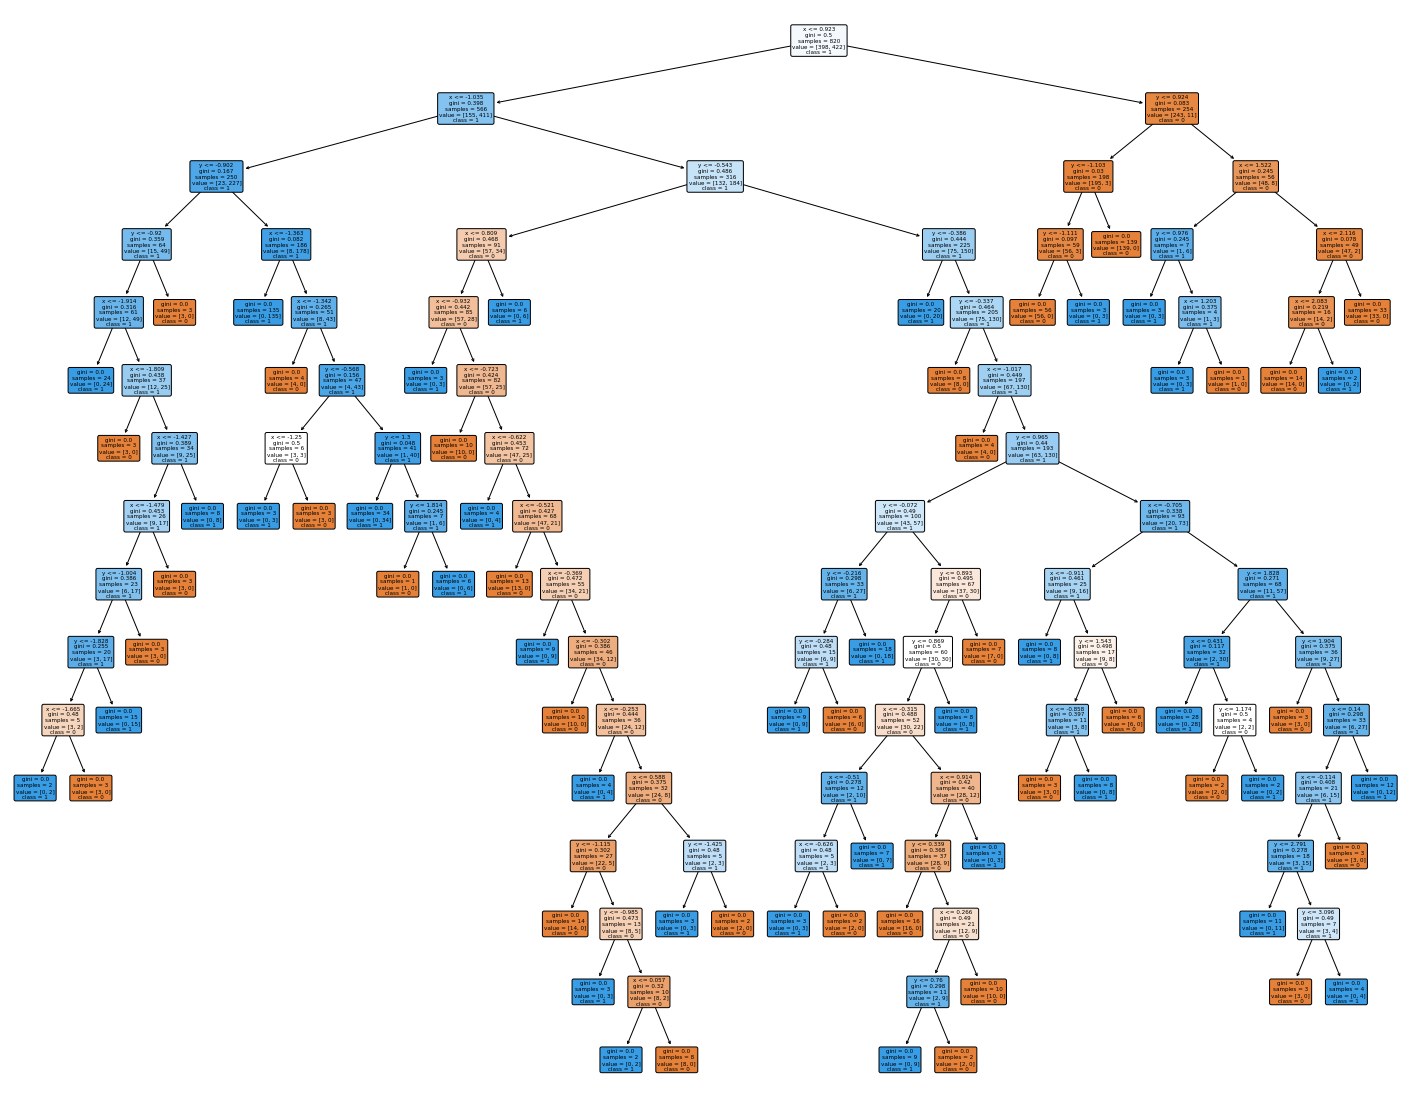

In [ ]:
feature_names = data_2d_df.columns[:2]

rcParams['figure.figsize'] = (25, 20)
plot_tree(dtree, 
          feature_names = feature_names , 
          class_names = ['0','1'] , 
          filled = True, 
          rounded = True)